# Report on U.N. World Happiness Data.

In [ ]:
#Link to GitHub

https://github.com/stellamym/Projects-AdvancedML.git

# Import Data

In [1]:
from matplotlib import pyplot
from numpy import loadtxt
from scipy import stats
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
x = pd.read_csv(r'/Users/stellama/Desktop/X_train.csv')
x.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [3]:
y = pd.read_csv(r'/Users/stellama/Desktop/y_train.csv')
y.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


# Data Preprocessing

In [4]:
y['Level'] = y['Very Low']

In [5]:
y.head()

,Average,High,Low,Very High,Very Low,Level
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [6]:
pos = 0
for a in y['Average']:
    if y['Average'][pos] == 1:
        y['Level'][pos] = 3
    pos += 1

pos = 0
for b in y['High']:
    if y['High'][pos] == 1:
        y['Level'][pos] = 4
    pos += 1
    
pos = 0
for c in y['Low']:
    if y['Low'][pos] == 1:
        y['Level'][pos] = 2
    pos += 1
    
    
pos = 0
for d in y['High']:
    if y['Very High'][pos] == 1:
        y['Level'][pos] = 5
    pos += 1

In [7]:
y.head()

,Average,High,Low,Very High,Very Low,Level
0,1,0,0,0,0,3
1,0,1,0,0,0,4
2,1,0,0,0,0,3
3,0,0,0,1,0,5
4,0,1,0,0,0,4


In [8]:
x['Happiness Level'] = y['Level']

In [9]:
x.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness Level
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,3
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,4
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,3
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,5
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,4


# Explore bivariate results

In [10]:
x.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,Happiness Level
GDP per capita,1.000000,0.753791,0.840467,0.458313,-0.069164,0.349372,-0.352544,0.831543
Social support,0.753791,1.000000,0.709605,0.502305,-0.015965,0.279549,-0.339582,0.745874
Healthy life expectancy,0.840467,0.709605,1.000000,0.419038,-0.024471,0.371450,-0.410411,0.793760
Freedom to make life choices,0.458313,0.502305,0.419038,1.000000,0.327923,0.496876,-0.362758,0.550373
Generosity,-0.069164,-0.015965,-0.024471,0.327923,1.000000,0.327683,0.032479,0.040826
Perceptions of corruption,0.349372,0.279549,0.371450,0.496876,0.327683,1.000000,-0.160908,0.393271
Terrorist_attacks,-0.352544,-0.339582,-0.410411,-0.362758,0.032479,-0.160908,1.000000,-0.372215
Happiness Level,0.831543,0.745874,0.793760,0.550373,0.040826,0.393271,-0.372215,1.000000


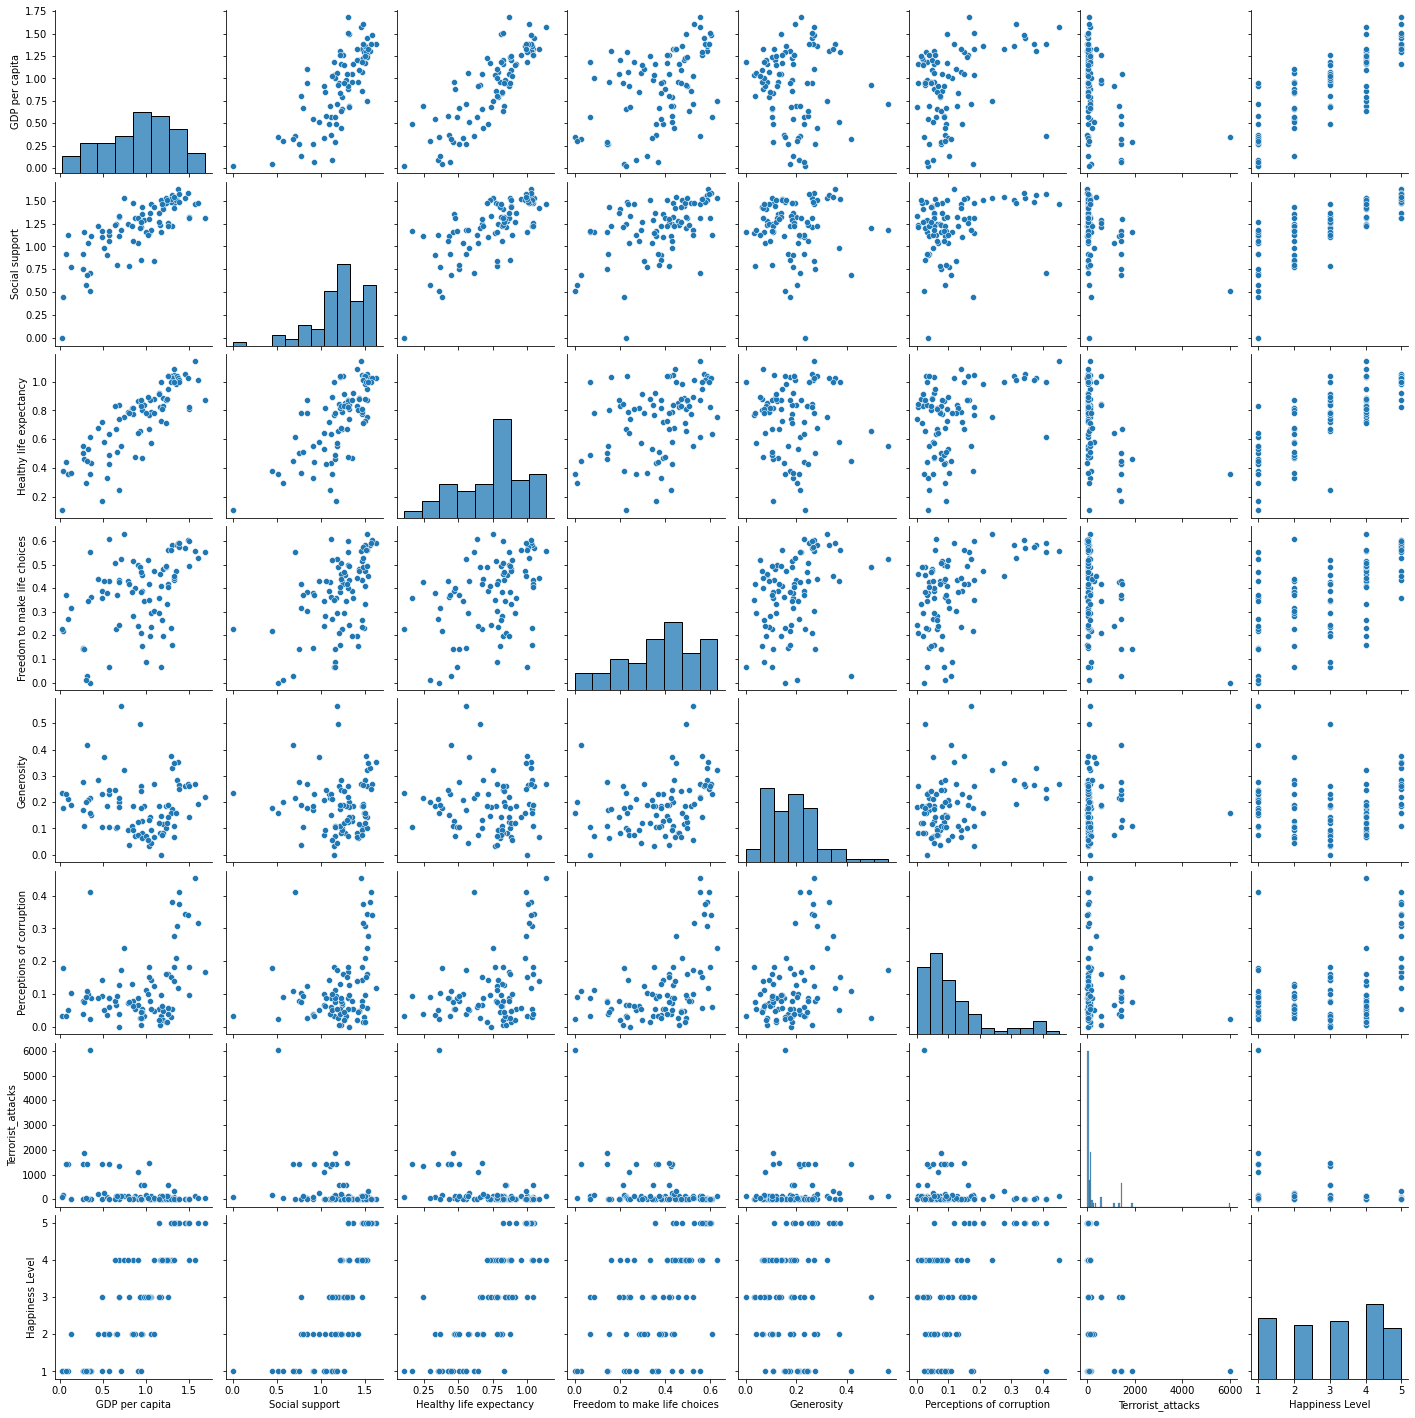

In [11]:
sns.pairplot(x)

Based on the previous analysis, I will take a look at the relationship between Social Support and Happiness Level.

<AxesSubplot:xlabel='Social support', ylabel='Happiness Level'>

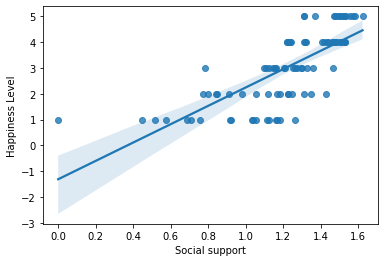

In [12]:
sns.regplot(x['Social support'],x['Happiness Level'])

According to the visualization, we can find that that there is a positive relation between Social Support and Happiness Level. The more social support, the higher happiness level.

# Examine features that predict happiness categories using one or more models that allow for automatic feature selection

In [13]:
X_train = x
y_train = x['Happiness Level']

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [15]:
X_proc = preprocessor.fit_transform(X_train)

# Number of features after pre-processing

print("feat post pre-processing: ", X_proc.shape[1])


clf = LogisticRegression(penalty='l1', solver = "liblinear")

clf.fit(X_proc, y_train)

model = SelectFromModel(clf, prefit=True)

X_select_feats = model.transform(X_proc)

# Number of features after automatic feature selection

print("feat post automatic feature selection: ", X_select_feats.shape[1])


feat post pre-processing:  27
feat post automatic feature selection:  17


# 3 Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state = 0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state = 0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

In [ ]:
from sklearn.ensemble import LogisticRegression

model = LogisticRegression(C = 1000.0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.